## 1
데이터 확인 및 전처리

In [164]:
import warnings
warnings.filterwarnings(action='ignore')

In [165]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,172266.0,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,-0.242598,-0.032176,1.189035,0.778034,-0.327769,0.351492,-0.213423,-0.176871,35.00,0
1189,172288.0,2.100535,-0.014620,-1.602113,0.184332,0.383228,-0.768377,0.207428,-0.299064,0.584681,0.003055,-0.965941,0.225244,0.274983,0.428356,0.793141,-0.104875,-0.647107,4.49,0
1190,172329.0,2.078542,-1.119785,-0.338306,-0.727997,-1.330486,-0.669741,-1.068741,-0.125540,0.191309,0.706048,-0.754812,-0.291895,0.614961,-0.634456,0.267806,1.148287,0.127145,47.22,0
1191,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,150.00,0


### 1.1 
EDA 데이터 탐색

In [166]:
data.info() # 결측치는 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


<Axes: xlabel='col', ylabel='value'>

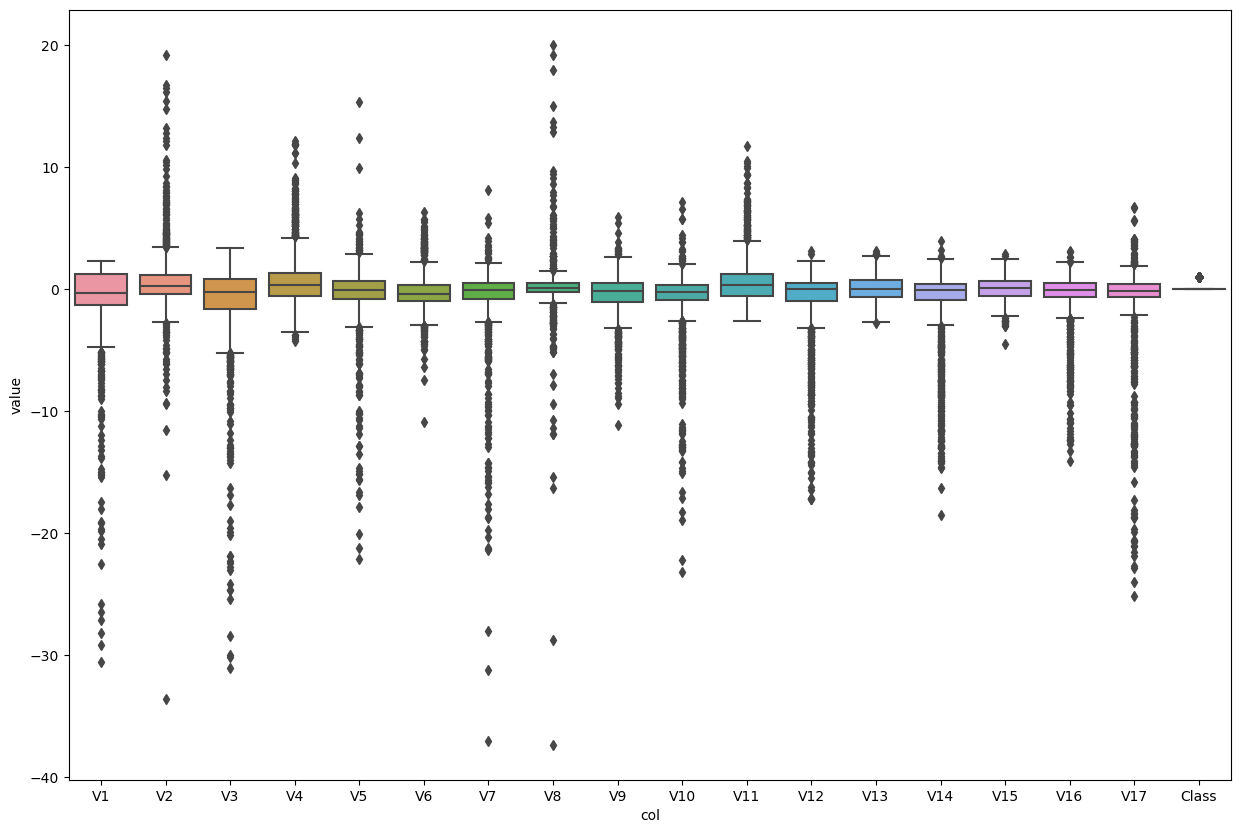

In [167]:
# 수치형 변수들의 분포가 어떻게 되어있는지 확인해보자.
# amount 의 경우 다른 변수와 데이터의 범위 차이가 크므로 Amount 를 제외한 변수들 먼저 시각화해보자.
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop(['Time', 'Amount'], axis = 1)

df_melt = pd.melt(X, var_name= 'col', value_name='value')

plt.figure(figsize = (15, 10))
sns.boxplot(data = df_melt, x = 'col', y = 'value')

# 이상치가 많이 보이는 것을 알 수 있으며, 이 이상치들이 사기 행위와 관련이 있다고 유추할 수 있다.

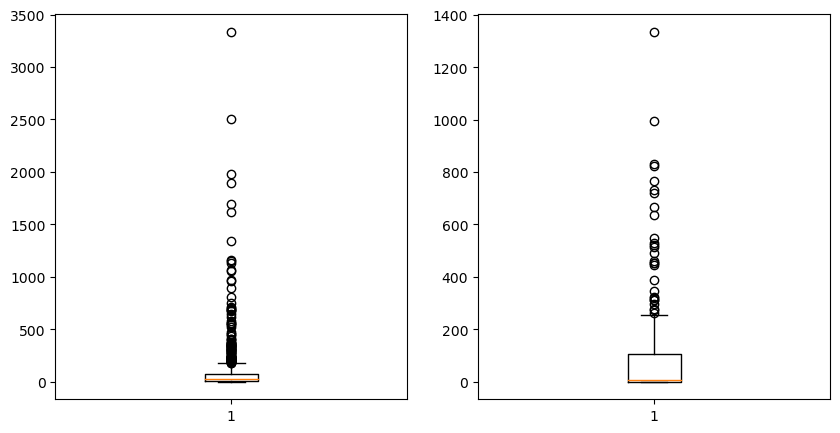

In [168]:
# Class 의 범주별로 거래금액이 어떻게 분포되어있는지 확인하자.
amount_0 = data[data.Class == 0]['Amount']
amount_1 = data[data.Class == 1]['Amount']

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize = (10, 5))
axes[0].boxplot(amount_0)
axes[1].boxplot(amount_1)

plt.show()

종속변수는 Class 이고 나머지 변수는 독립변수이다.  
모든 독립변수가 수치형 변수이다.  
종속변수 Class 는 0, 1인 범주형 변수이므로 종속변수에 따른 독립변수의 분포를 살펴보자.

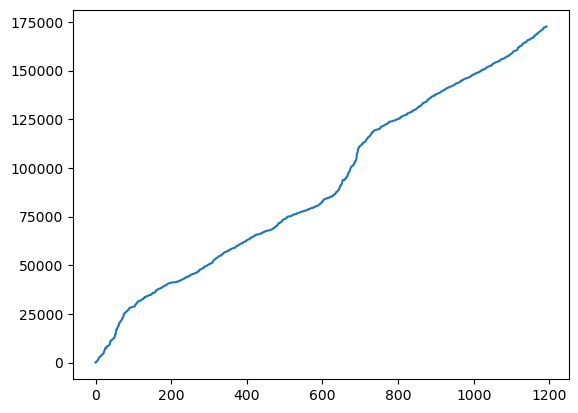

In [169]:
import matplotlib.pyplot as plt

data.Time.plot()
plt.show()

Time 변수를 그래프로 그려봤을 때 순차적인 시간의 흐름을 나타내는 변수라고 판단됨.  
분류 분석에서 필요없는 변수로 판단하고 제거하겠다.

In [170]:
data = data.drop(['Time'], axis = 1)

In [171]:
df_m = data.groupby('Class').mean()
df_c = data.groupby('Class').count()

Text(0.5, 1.0, 'count')

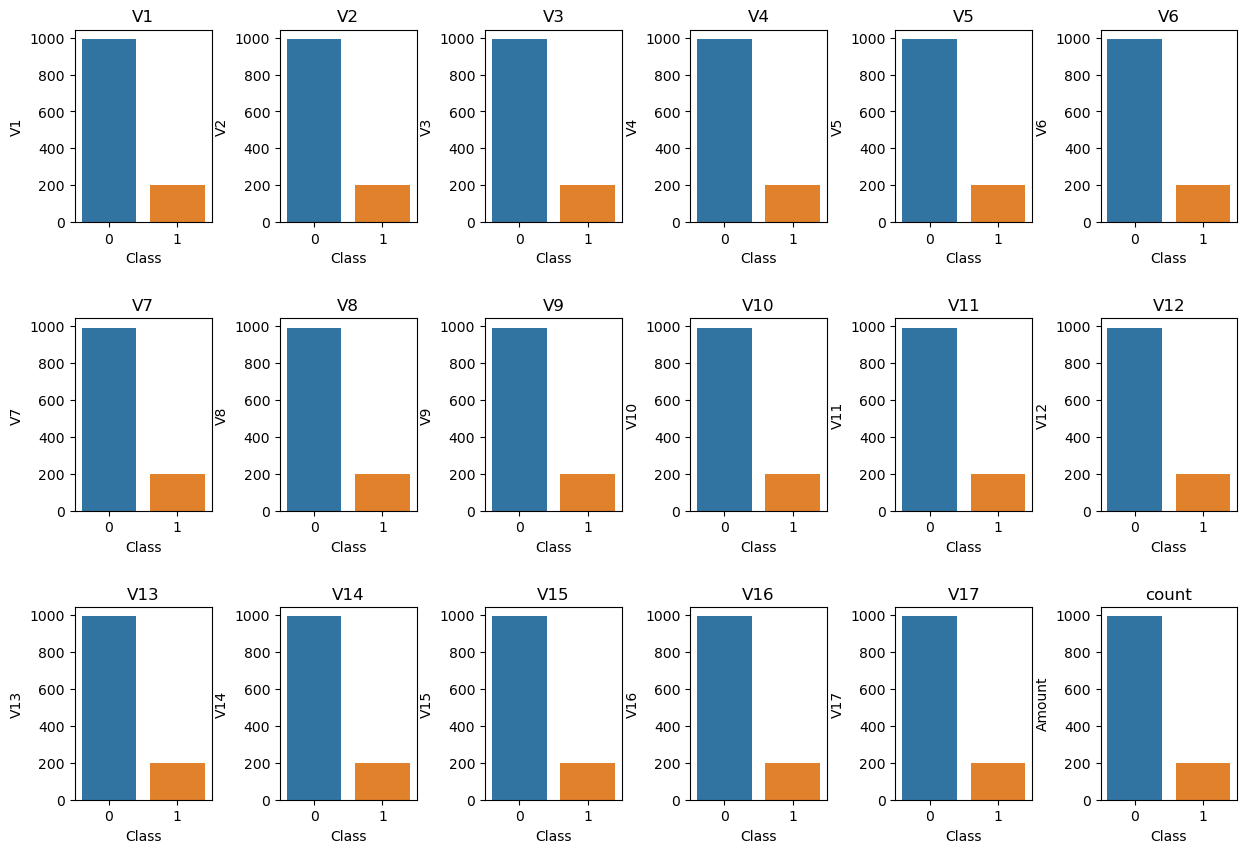

In [172]:
import seaborn as sns
fig, axes = plt.subplots(3, 6, figsize = (15, 10))
plt.subplots_adjust(hspace=0.5, wspace= 0.5)
for i in range(18):
    sns.barplot(x = df_c.index, y = df_c.iloc[:, i], ax = axes[i // 6][i % 6])
    axes[i // 6][i % 6].set_title(df_c.columns[i])

plt.title('count')

Text(0.5, 1.0, 'mean')

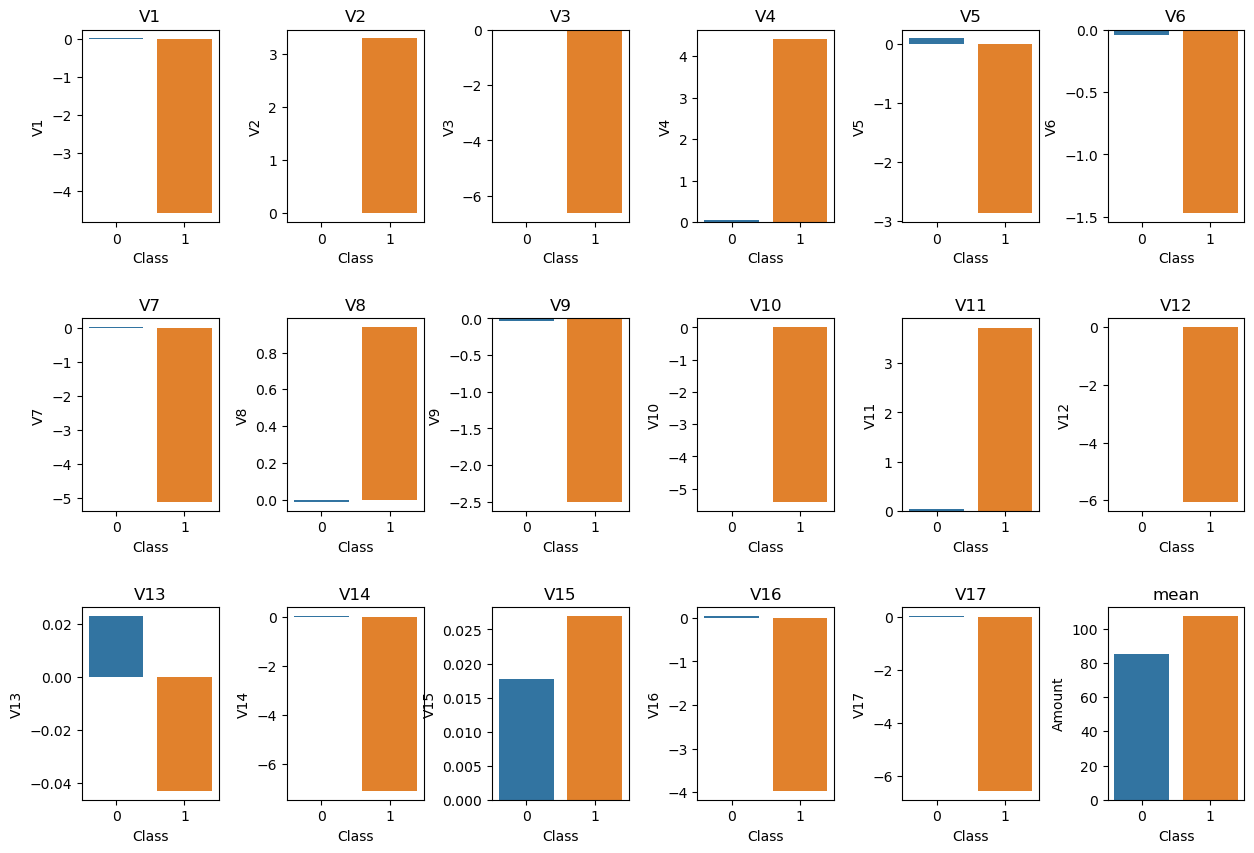

In [173]:
import seaborn as sns
fig, axes = plt.subplots(3, 6, figsize = (15, 10))
plt.subplots_adjust(hspace=0.5, wspace= 0.5)
for i in range(18):
    sns.barplot(x = df_m.index, y = df_m.iloc[:, i], ax = axes[i // 6][i % 6])
    axes[i // 6][i % 6].set_title(df_m.columns[i])

plt.title('mean')

클래스별 개수를 보았을 때는 모든 변수에서 정상 카드 결제인 0이 더 많은 것을 알 수 있고, 평균을 시각화했을 때는 이상 결제인 1 클래스가 더 많은 것을 알 수 있었다.  
즉 이상 카드 결제 내역은 금액이 클 것으로 유추할 수 있다.

### 1.2 
변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

<Axes: >

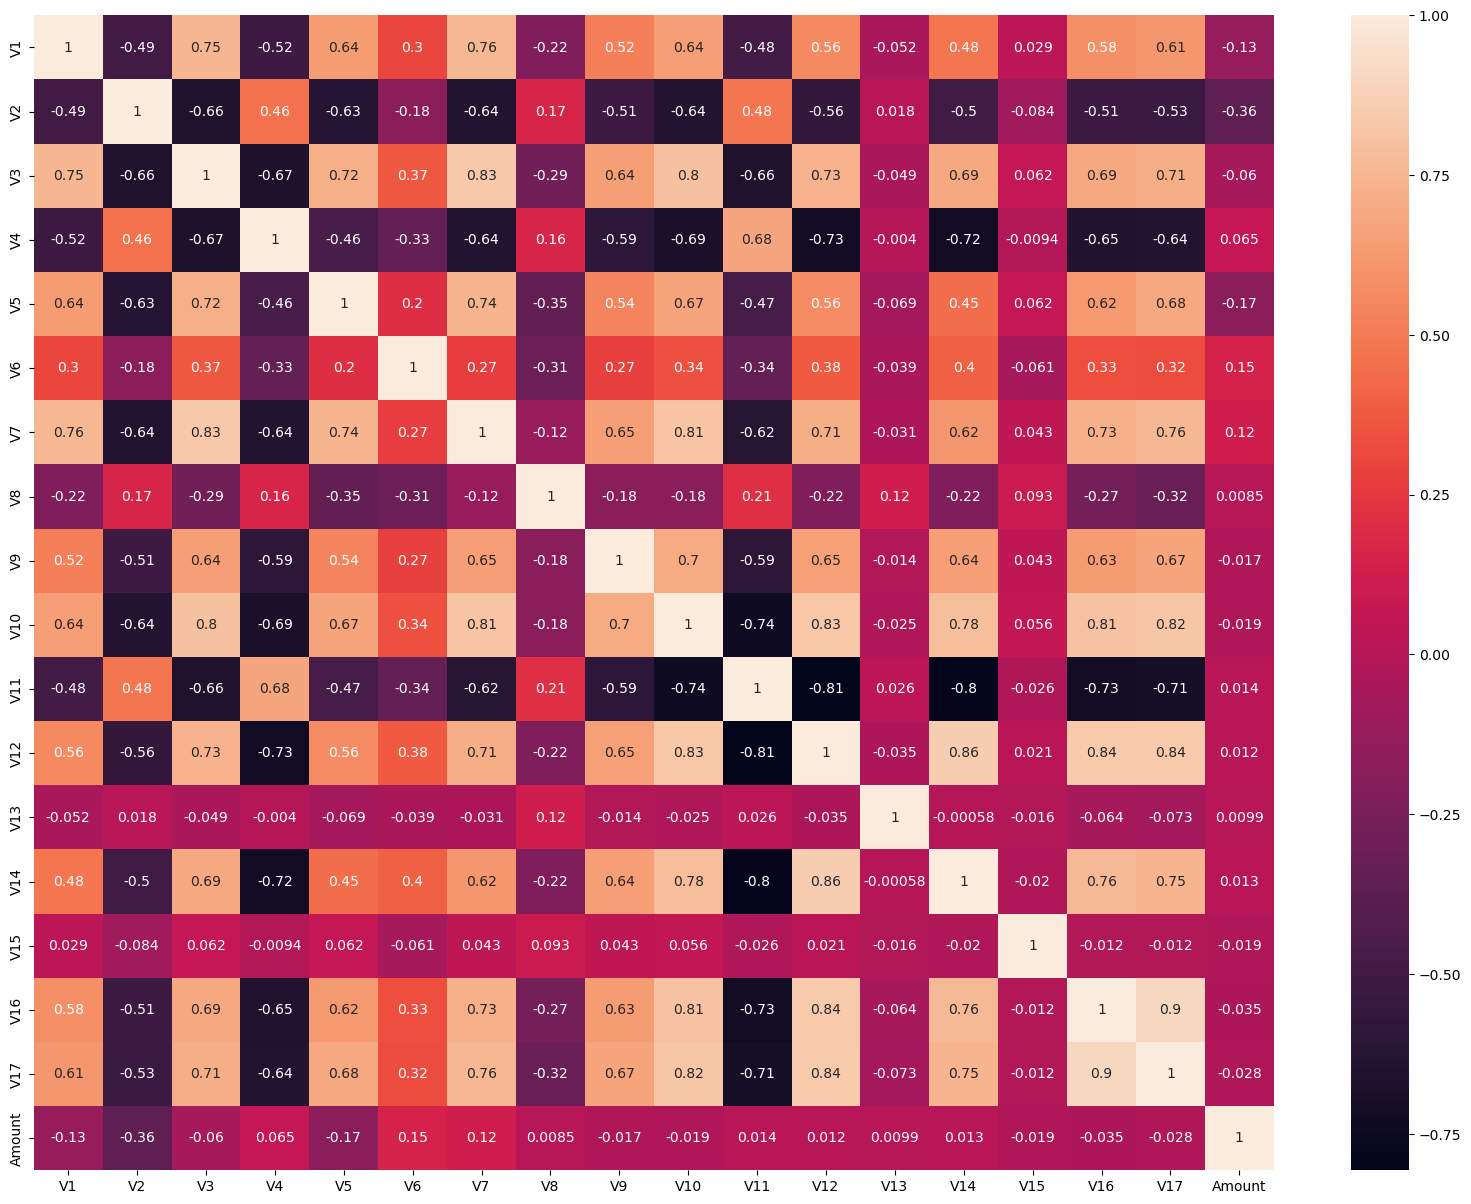

In [174]:
# 독립변수들 간의 상관관계를 살펴보자.

corr = data.drop(['Class'], axis =1 ).corr(method= 'pearson')
fig, ax = plt.subplots(1,1, figsize = (20, 15))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot= True)

상관계수가 0.8 이상인 강한상관관계를 가지는 변수가 있고, 0.6 이상의 상관관계가 존재하는 변수들도 다수 존재한다. 즉 다중공선성을 제거하는 과정이 필요해보인다.

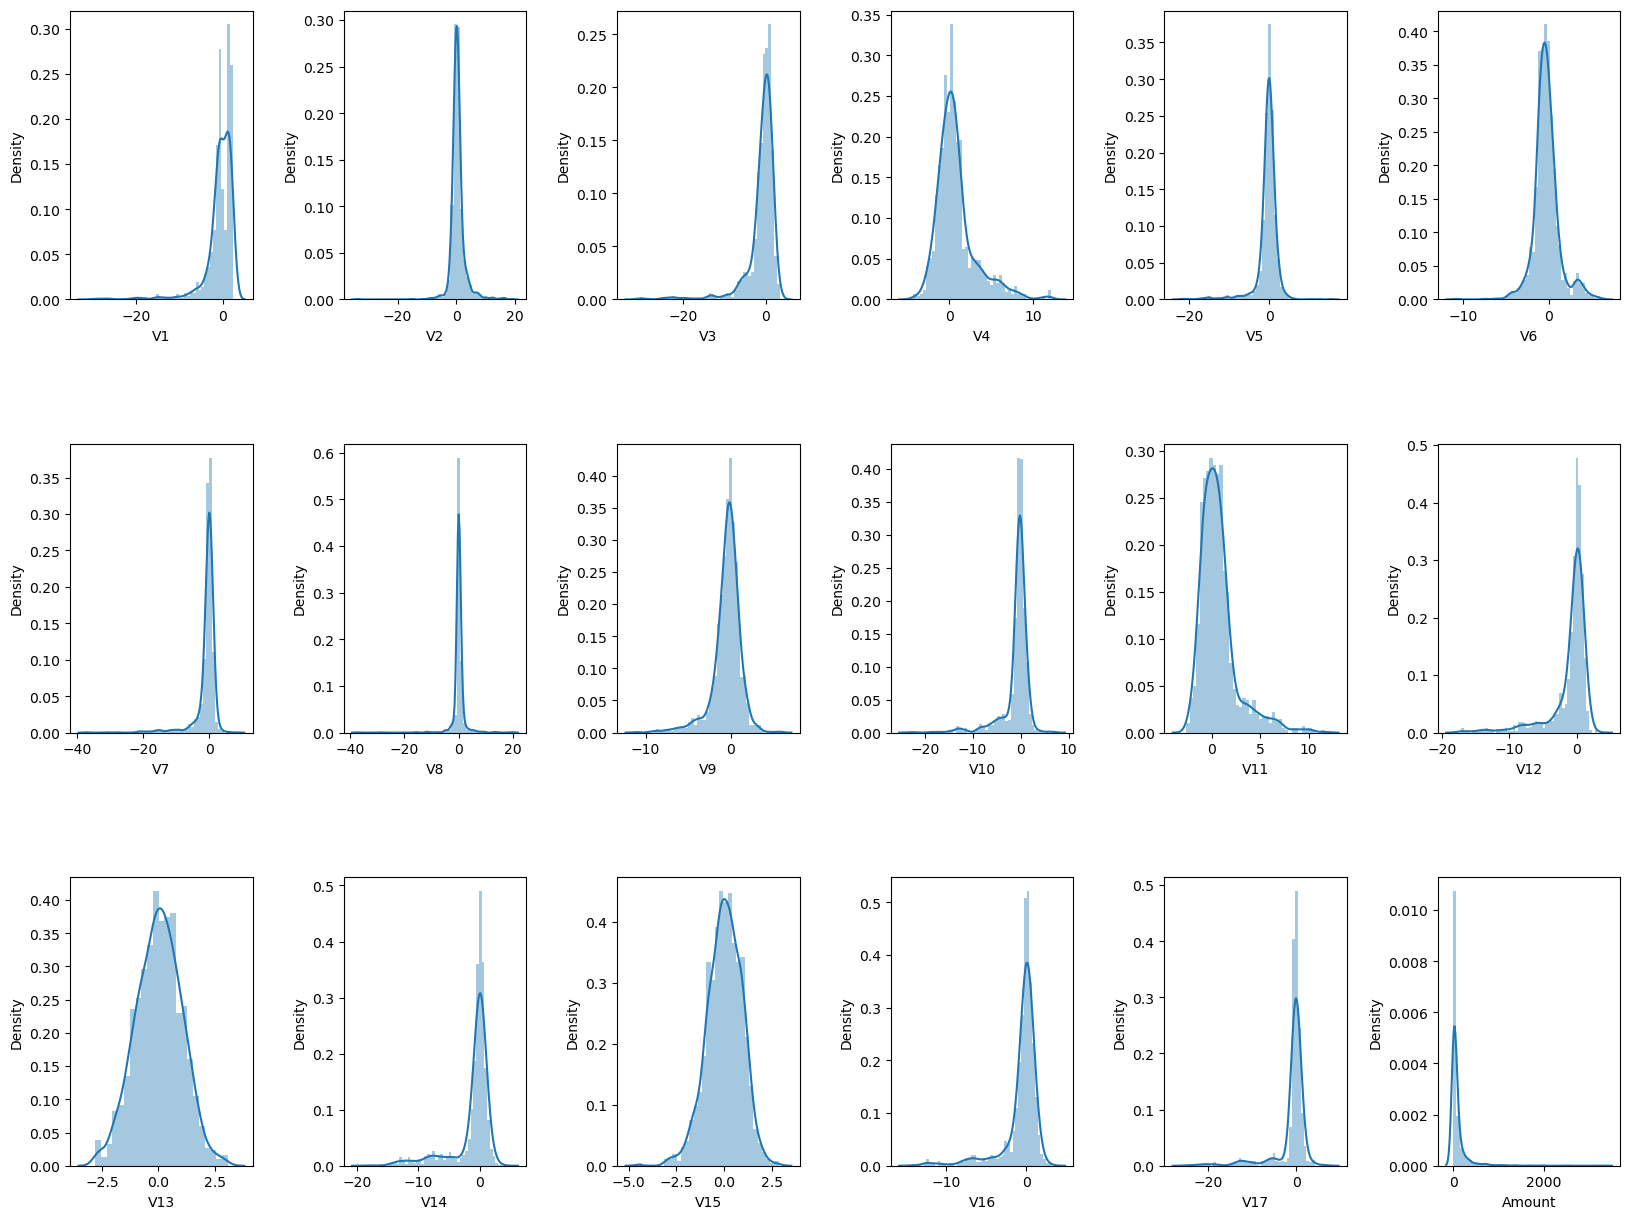

In [175]:
fig, axes = plt.subplots(3, 6, figsize = (20, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, col in enumerate(data.columns.drop(['Class'])):
    sns.distplot(data[col], ax = axes[i//6,i%6])

plt.show()

### 2.1 
차원축소 방법 2가지 이상 비교하고 한가지 선택

PCA
+ 차원 축소에서 가장 많이 사용되는 차원 추출 방식
+ 여러 변수 간에 존재하는 상관관계를 이용하는 차원 축소 방법으로 데이터를 축에 사용했을 때 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정하는 방법

변수선택법
+ 전진선택법, 후진제거법, 단계별선택법이 있다.
+ 전진선택법 : 기존 모형에서 가장 설명력이 좋은 변수를 하나씩 선택하는 방법
+ 후진제거법 : 모든 변수가 포함된 모형에서 설명력이 가장 작은 변수를 제거해나가는 방식
+ 단계적선택법 : 전진선택법에 후진제거법을 추가한 방법

PCA 를 선택하겠다.

### 2-2
추천한 한 가지를 실제로 수행하고 선택한 이유 설명

이 데이터에서는 변수들끼리 상관성이 존재하며, V1 ~ V17 의 데이터가 명확하지 않으니 PCA가 적합하다고 생각된다.

In [176]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,-0.242598,-0.032176,1.189035,0.778034,-0.327769,0.351492,-0.213423,-0.176871,35.00,0
1189,2.100535,-0.014620,-1.602113,0.184332,0.383228,-0.768377,0.207428,-0.299064,0.584681,0.003055,-0.965941,0.225244,0.274983,0.428356,0.793141,-0.104875,-0.647107,4.49,0
1190,2.078542,-1.119785,-0.338306,-0.727997,-1.330486,-0.669741,-1.068741,-0.125540,0.191309,0.706048,-0.754812,-0.291895,0.614961,-0.634456,0.267806,1.148287,0.127145,47.22,0
1191,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,150.00,0


In [177]:
# PCA 를 하기 전에 Amount 변수는 범위가 스케일링 되어있지 않으므로 스케일링을 진행한다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['scaled_Amount'] = scaler.fit_transform(data[['Amount']])

data1 = data.drop(['Amount'], axis = 1)

from sklearn.decomposition import PCA

data1 = data1.drop(['Class'], axis = 1)
pca = PCA(n_components=18)

pca.fit(data1)

exp_var = pd.DataFrame(pca.explained_variance_ratio_, columns = ['exp_var'])
exp_var['cum_exp_var'] = exp_var['exp_var'].cumsum()
exp_var

# 분산설명력이 80% 이상이 되는 주성분이 4개가 되는 것이 적절하다.

,exp_var,cum_exp_var
0,0.657913,0.657913
1,0.078395,0.736308
2,0.052393,0.788701
3,0.039894,0.828596
4,0.036785,0.865380
5,0.021232,0.886612
6,0.016052,0.902665
7,0.015740,0.918404
8,0.012551,0.930955
9,0.011494,0.942450


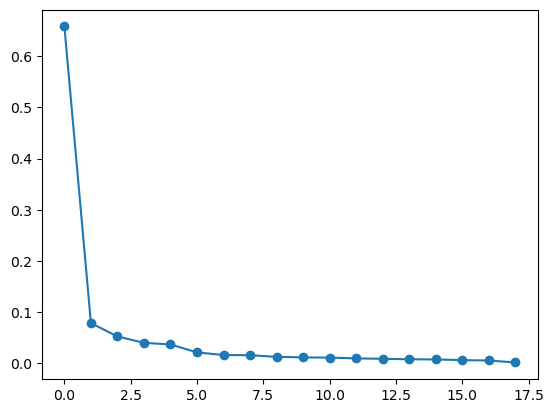

In [178]:
plt.plot(pca.explained_variance_ratio_, 'o-')

In [179]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(data1)
pca_data = pd.DataFrame(pca_data, columns = ['pca1', 'pca2', 'pca3', 'pca4'])
pca_data

,pca1,pca2,pca3,pca4
0,-3.169659,-0.196625,-0.230591,-0.531935
1,5.884147,-2.243857,0.031109,0.326305
2,-2.798817,2.290639,5.255068,0.092571
3,-2.522372,-0.243237,-0.090560,5.094170
4,-3.187271,0.238878,-0.158142,0.116610
...,...,...,...,...
1188,-3.322659,-0.108365,-0.419234,-0.958804
1189,-3.268205,-0.222419,-0.152487,-1.211250
1190,-3.546539,0.051258,-0.348214,-0.929180
1191,-0.083645,6.467610,-2.622993,1.388989


### 3-1
오버샘플링과 언더샘플링 장단점 비교 및 선택 구현

오버샘플링
+ 데이터 세트의 균형을 맞추기 위해 소수 클래스의 데이터를 다수 클래스 데이터 수 만큼 만드는 것
+ 대표적으로 랜덤오버 샘플링과 SMOTE 등이 있다.

언더샘플링
+ 데이터 세트의 균형을 맞추기 위해 다수 클래스의 데이터를 소수 클래스 데이터 수 만큼 줄이는 것
+ 대표적으로 랜덤언더샘플링이 있다.
+ 언더샘플링을 하게 되면 데이터의 정보가 손실되기 때문에 데이터 세트가 적은 경우 과소적합의 위험이 있으며 설명력이 떨어질 수 있다.

데이터 세트가 크지 않기 때문에 데이터 손실 위험이 크므로 오버샘플링을 선택하겠다.

### 3-2
구현 및 알고리즘 2가지 이상 비교, 성능 측정

In [180]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split

X = pca_data
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

smote = SMOTE(k_neighbors=3)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_ros, y_train_ros)
y_pred_ros = rf.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)
y_pred_sm = rf.predict(X_test)

print('original accuracy :', accuracy_score(y_test, y_pred))
print('ros accuracy :', accuracy_score(y_test, y_pred_ros))
print('smote accuracy :', accuracy_score(y_test, y_pred_sm))

original accuracy : 0.9832402234636871
ros accuracy : 0.9860335195530726
smote accuracy : 0.9748603351955307


랜덤포레스트 기법으로 간단하게 분류분석을 수행했을 때 accuracy 를 평가지표로 했을 때 랜덤오버샘플링이 성능이 더 좋았다.

### 3-3
현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [3,4,5,6], 'min_samples_leaf' : np.arange(2, 30, 3)}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid)
grid_rf.fit(X_train_ros, y_train_ros)

grid_rf.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

accuracy_score : 0.9832402234636871
roc_auc score : 0.9795707190160833


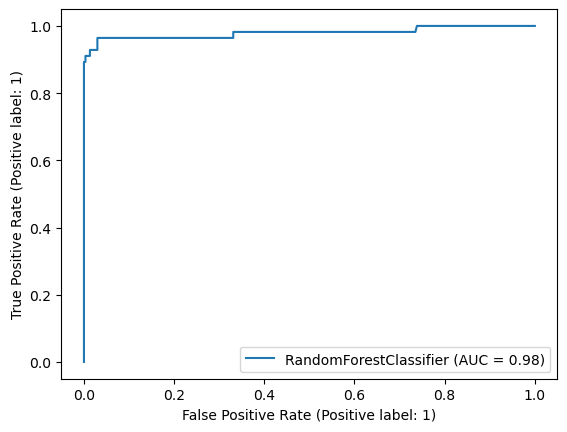

In [184]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

rf = RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=2)
rf.fit(X_train_ros, y_train_ros)

y_pred = rf.predict(X_test)

print('accuracy_score :', accuracy_score(y_test, y_pred))
print('roc_auc score :', roc_auc_score(y_test , rf.predict_proba(X_test)[:, 1]))

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

오버샘플링 기법에는 랜덤오버샘플링 기법이 정확도를 기준으로 더 좋았다.  
랜덤포레스트 모델의 경우는 굳이 오버샘플링을 하지 않아도 높은 예측력을 보인다.


### 4-1
이상탐지 모델 2가지 이상 기술, 장/단점 설명

Isolation Forest
+ 기능과 분할 값을 무작위로 선택하여 데이터를 더 작은 하위 집합으로 분할하는 트리기반 모델. 그 후 관찰을 얼마나 빨리 격리할수 있는지에 따라 이상 점수를 할당함
+ 장점
    + 고차원 데이터 세트에서 잘 작동
    + 빠르고 효율적
    + 데이터 분포에 대한 사전 지식이나 가정이 필요하지 않음
+ 단점
    + 데이터가 고도로 구조화된 경우에는 효과적이지 않음
    + 다중 모달 데이터로 어려움을 겪을 수 있음

LOF(Local Outlier Factor)
+ 각 관측치의 로컬 밀도를 계산하고 이를 이웃 항목과 비교하여 이상값을 식별하는 밀도 기반 모델
+ 장점
    + 고차원 데이터에서 이상값을 식별하는 데 효과적
    + 복잡한 구조의 데이터 세트에서 잘 작동
    + 글로벌 및 로컬 이상값을 모두 처리할 수 있음
+ 단점
    + 이웃 수와 사용된 거리 메트릭에 민감함
    + 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음
    + 편향된 분포를 가진 데이터 세트에서 잘못된 긍정을 생성할 수 있음

One-class SVM
+ 데이터를 원점과 분리하기 위해 데이터를 더 높은 차원의 공간에 매핑하는 커널 기반 모델임. 그런 다음 이상값을 결정 경계에서 가장 멀리 떨어진 관측값으로 식별
+ 장점
    + 고차원 데이터에서 이상값을 식별하는데 효과적
    + 비선형 구조의 데이터 세트에서 잘 작동
    + 글로벌 및 로컬 이상값을 모두 처리할 수 있음
+ 단점
    + 효과적으로 작동하려면 하이퍼파라미터 조정이 필요할 수 있음
    + 커널 공간에서 데이터를 분리할 수 없는 경우 성능이 좋지 않을 수 있음
    + 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음

### 4-2
2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교

In [185]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import completeness_score

isf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.17)
isf.fit(X_train_ros, y_train_ros)

y_pred_isf = isf.predict(X_test)
y_pred_isf = pd.Series(y_pred_isf).map({1 : 0, -1 : 1})

accuracy_score(y_test, y_pred_isf)

0.8938547486033519

정확도 기준으로 비교하였을 때 랜덤오버샘플링 모델이 더 정확하다고 할 수 있다.

### 4.3 
데이터분석가 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

3번에서 만든 모델은 스케일링과 PCA 를 거친 데이터를 랜덤오버샘플링을 적용하여 랜덤포레스트 분류 모델로 분류하였다. 정확도를 기준으로 평가하였을 때 0.98의 정확도가 나왔다.  

4번에서 만든 모델은 이상탐지 모델로 1이면 정상 데이터, -1이면 이상치로 분류되었고 test 데이터와의 정확도 계산을 위해 정상 데이터를 0, 이상치를 1로 바꿔주었다. 정확도는 0.88이 나왔다.

정확도를 기준으로 보았을 때 이상탐지 모델보다는 오버샘플링한 랜덤포레스트 분류가 더 정확하다고 할 수 있다.

### 5
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [186]:
# 기하평균을 사용하자.
from scipy.stats import gmean
data = [100000, 150000, 250000]

data1 = [150000 / 100000, 250000 / 150000]
print('연평균 상승률 : {:.2f}%'.format(gmean(data1)*100))

연평균 상승률 : 158.11%


### 6
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [187]:
from scipy.stats import t

d = 15.5
v = 3.2
n = 12
df = n - 1
conf_a = 0.10
tstats = t.ppf(1-conf_a/2, df)
CI1 = 15 - tstats * np.sqrt(v/n)
CI2 = 15 + tstats * np.sqrt(v/n)

print('90% 신뢰구간 : {} ~ {}'.format(CI1, CI2))
t.interval(alpha = 0.9, loc = 15.5, scale = np.sqrt(v/n), df = n-1)

90% 신뢰구간 : 14.072609067393861 ~ 15.927390932606139


(14.572609067393861, 16.427390932606137)

## 7
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

In [188]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


### 7-1
7.1 귀무가설과 대립가설을 세우시오

In [189]:
# H0 : 강의 상류와 하류의 생물 다양성 점수는 같다.
# H1 : 강의 상류와 하류의 생물 다양성 점수는 다르다.

### 7-2
7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [190]:
# 정규성 검정
from scipy.stats import shapiro

shapiro(df['up'] - df['down'])

ShapiroResult(statistic=0.9554132223129272, pvalue=0.48579514026641846)

In [191]:
# 대응표본 T 검정 사용
from scipy.stats import ttest_rel

statistic, pvalue = ttest_rel(df['up'], df['down'], alternative='two-sided')

print(statistic)
print(pvalue)

# pvalue 가 0.05보다 크므로 귀무가설을 기각할 수 없다.
# 강의 상류와 하류의 생물 다양성 점수는 같다.   

1.2922226959983891
0.21262429174344777


### 8-1
user_counts를 종속변수로 하는 데이터이다  
분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [192]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


In [193]:
from sklearn.linear_model import QuantileRegressor

X = df.drop(['user_counts'], axis = 1)
y = df['user_counts']
quan = QuantileRegressor()
quan.fit(X,y)

quan.coef_

array([ 2.13487559e+02, -4.58080067e-10, -2.71878592e-10])

### 8-2
8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [194]:
np.dot(quan.coef_,np.array([10.5, 8.2, 3.5]) )+quan.intercept_

8278.75423591262

### 9-1
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)
귀무가설과 대립가설 설정하라

In [195]:
df = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


이원배치 분산분석의 가설검정

상호작용효과 검정에 대한 가설
+ H0 : 지하철 호선 종류와 월 간에는 상호작용 효과가 없다.  
+ H1 : 지하철 호선 종류와 월 간에는 상호작용 효과가 있다.

주효과 검정에 대한 가설  
+ H0 : 지하철 호선 종류에 따른 승객 수 차이는 없다.
+ H1 : 지하철 호선 종류에 따른 승객 수 차이는 있다.
<br/><br/>
+ H0 : 월별에 따른 승객 수 차이는 없다.
+ H1 : 월별에 따른 승객 수 차이는 있다.

In [196]:
month = df.month
line = df.line
total = df.total

In [197]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('total ~ C(month)*C(line)', data = df).fit()
aov_talbe = anova_lm(model)
aov_talbe

,df,sum_sq,mean_sq,F,PR(>F)
C(month),11.0,3.206533e+04,2.915030e+03,28.134341,2.103496e-14
C(line),2.0,2.147444e+06,1.073722e+06,10362.998525,2.007247e-50
C(month):C(line),22.0,9.696908e+04,4.407686e+03,42.540665,1.582232e-19
Residual,36.0,3.730000e+03,1.036111e+02,NaN,NaN


### 9-2
통계량을 구하고, 대립가설 채택여부를 기술하라

상호작용 효과 검정에 대한 가설검정에서 p 값이 0.05보다 작으므로 월별과 지하철 호선 사이에는 상호작용 효과가 있다.  
주효과 검정에서 두 변수 모두 p 값이 0.05보다 작으므로 지하철 노선에 따른 승객수와 월별에 따른 승객 수 모두 차이가 있다.


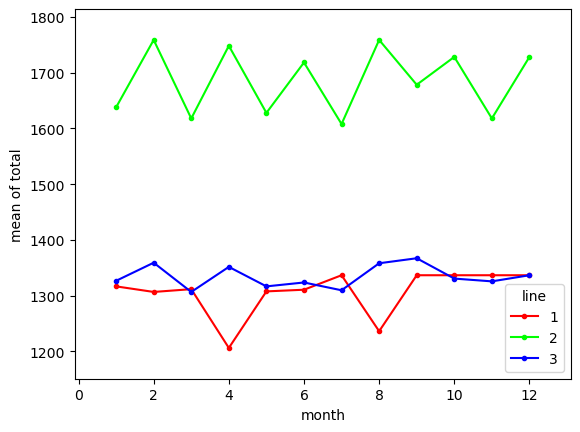

In [198]:
# 상호작용 그래프
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(month, line, total)
plt.show()